<span style="color:red; font-size:30px; "> PCA - Python Implementaion  </span>

In [50]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [51]:
data = pd.read_csv('glass.data')
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [52]:
# drop index columns . 
data.drop("index",axis = 1,inplace = True)
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [53]:
print("print data shape \n")
print("number of rows : ",data.shape[0])
print("number of cols : ",data.shape[1])
print("\n_____________________________\n ")
print("check for null value's ") 
data.isnull().sum()

print data shape 

number of rows :  214
number of cols :  10

_____________________________
 
check for null value's 


RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

# Steps in PCA

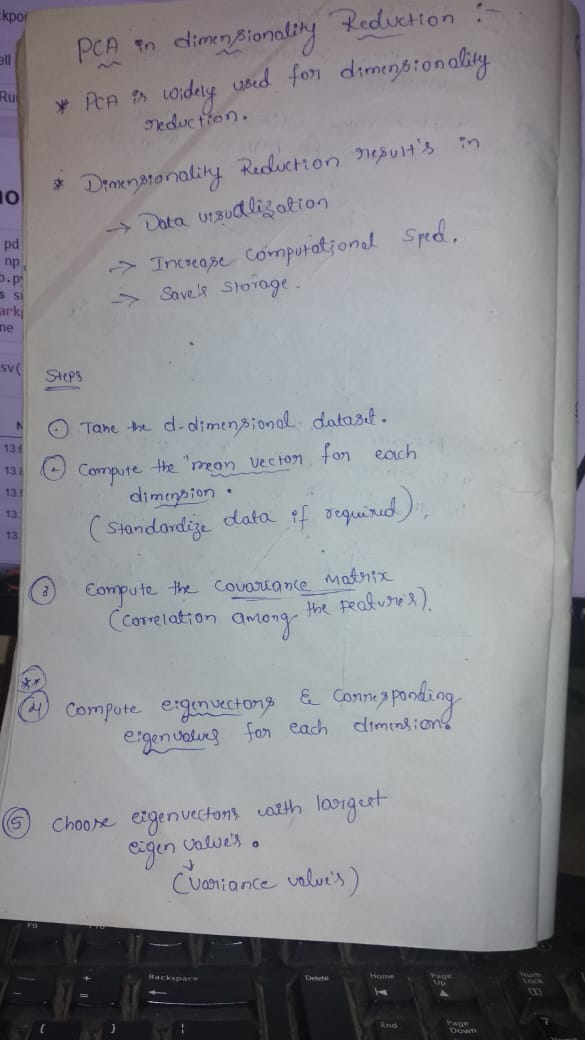

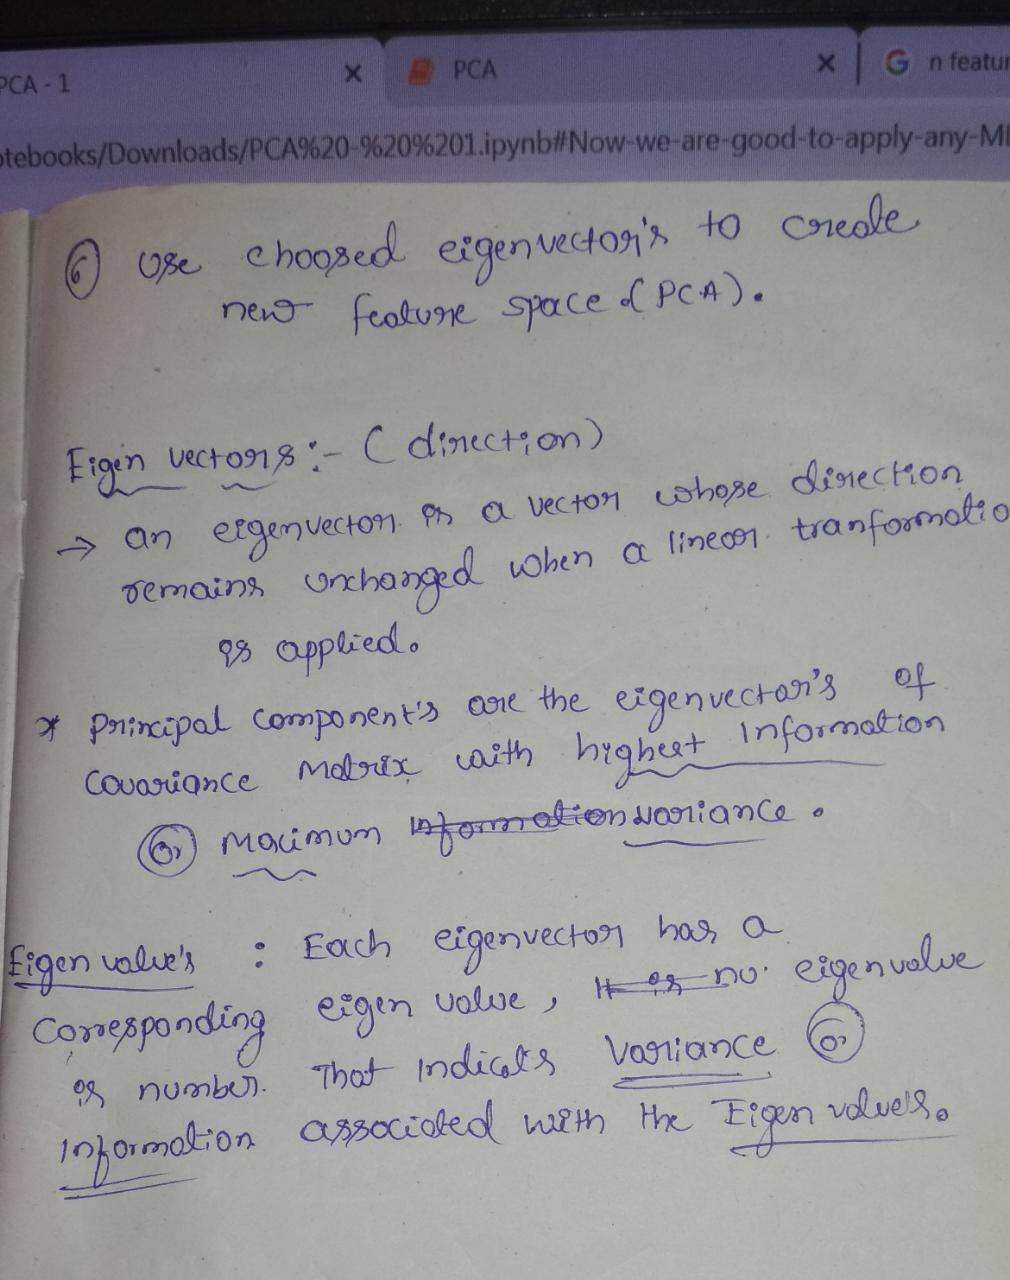

In [54]:
# As we know PCA is a unsupervised technique used for Dimensionality reduction or As Data Preprocessing step .
# PCA is Feature Extraction technique . 
data = data.iloc[:,0:9]
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [55]:
# standardise data if the features are in different scales  .       
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
scaled_data = SC.fit_transform(data)

In [56]:
scaled_data = pd.DataFrame(scaled_data,columns  = data.columns)
scaled_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [57]:
from sklearn.decomposition import PCA
pca = PCA()
pricipal_components =  pca.fit_transform(scaled_data)

In [58]:
pca.explained_variance_ratio_
# varaince simply means that how the data is spread out along principal components 
# in other words more the variance value higher the information along principal components 
 

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [59]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27901819, 0.50680399, 0.66289777, 0.79154915, 0.89310496,
       0.95173109, 0.99272647, 0.99982124, 1.        ])

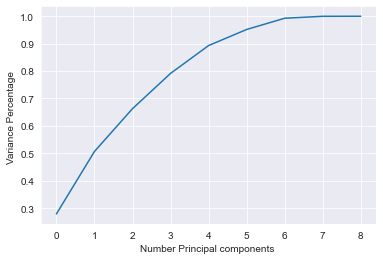

In [60]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number Principal components ")
plt.ylabel("Variance Percentage ")
plt.show()

As you can see that 90% of the variance or information is just explained using  5 Principal component's .hence we are going to use only 5 PCA instead of using 9 features from the original data.

In [61]:
pca =  PCA(n_components = 5)
pca_data = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(pca_data,
columns =['PC1','PC2','PC3','PC4','PC5']    )
pca_data.head()
# see we have reduced our dimension from 9 to 5

,PC1,PC2,PC3,PC4,PC5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090


#### Now we are good to apply any ML algorithm on using this PCA Data .

# Thank You !